<H1> Combined Model (VGG 3 Blocks) </H1>

We will begin with three basic VGG CNN layers, each followed by a max pooling layer. Max pooling efficiently reduces parameter size while preserving information. As usual in deep learning models, we will flatten the intermediate layer outputs and pass them to a dense network. The dense network output will then go to a final output layer with 10 units, corresponding to our 10 categories. We will use Softmax as the final activation to select the most probable class from the 10 categories.

<H1> Loading Libraries </H1>

In [11]:
!pip install graphviz pydot

In [14]:
!pip install netron

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB 131.3 kB/s eta 0:00:13
    --------------------------------------- 0.0/1.7 MB 163.8 kB/s eta 0:00:11
   - -------------------------------------- 0.1/1.7 MB 297.7 kB/s eta 0:00:06
   ------- -------------------------------- 0.3/1.7 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.7 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.6 MB/s eta 0:00:00


In [10]:
!pip install pydot

In [2]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# visuals
import matplotlib.pyplot as plt

<H1>Data Preparation:</H1>

The Cifar10 dataset is loaded and split into training and testing sets.
The images are reshaped to include three channels (color) and normalized to the range [0, 1].
Labels are one-hot encoded to match the output layer of the network.

In [3]:
# declare some important variables
BATCH_SIZE = 64
EPOCHS = 50

In [4]:
train_dir = "../UPI SUMMER COURSE/tomato_leave_diseases_dataset/tomato/train"
val_dir = "../UPI SUMMER COURSE/tomato_leave_diseases_dataset/tomato/train"
test_dir = "../UPI SUMMER COURSE/tomato_leave_diseases_dataset/tomato/test"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True
)

# Only rescale for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches
validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=1,
    class_mode='categorical'
)

Found 15064 images belonging to 10 classes.
Found 15064 images belonging to 10 classes.
Found 3771 images belonging to 10 classes.


<H1> Model Architecture: </H1>


In [6]:
# Define the CNN model
simple_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block 1
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting

# block 2
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting

# block 3
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting

# head of the model
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(128, activation='relu'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting
simple_model.add(layers.Dense(10, activation='softmax'))

C:\Users\Leena Ardini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
simple_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 356,266 (1.36 MB)

 Trainable params: 355,114 (1.35 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [16]:
#plot_model(simple_model)
import netron

# Save the model
simple_model.save('simple_model.h5')

# Visualize the model
netron.start('simple_model.h5')

Serving 'simple_model.h5' at http://localhost:8080


('localhost', 8080)

<H1> Model Training: </H1>

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
The fit function trains the model using the training data and evaluates it on the test data for EPOCHS epochs with a batch size of BATCH_SIZE

In [17]:
# Compile the model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_train = simple_model.fit(train_generator, 
                            validation_data=validation_generator, 
                            epochs=EPOCHS, 
                            # batch_size=BATCH_SIZE
                            )


Epoch 1/50


C:\Users\Leena Ardini\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


236/236 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.5733 - loss: 1.3368 - val_accuracy: 0.1484 - val_loss: 4.9695
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 109s 459ms/step - accuracy: 0.8330 - loss: 0.4857 - val_accuracy: 0.3603 - val_loss: 3.3565
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 236s 998ms/step - accuracy: 0.8812 - loss: 0.3448 - val_accuracy: 0.9124 - val_loss: 0.2497
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 108s 451ms/step - accuracy: 0.9049 - loss: 0.2805 - val_accuracy: 0.8293 - val_loss: 0.4989
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 105s 443ms/step - accuracy: 0.9117 - loss: 0.2452 - val_accuracy: 0.5917 - val_loss: 1.7019
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 104s 435ms/step - accuracy: 0.9177 - loss: 0.2323 - val_accuracy: 0.8097 - val_loss: 0.7807
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 104s 437ms/step - accuracy: 0.9423 - loss: 0.1636 - val_accuracy: 0.9332 - val_loss: 0.1915
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 104s 436ms/step - accuracy: 0.9499 - loss: 0.1438 

In [18]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on Tomato Leaf Disease Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on Tomato Leaf Disease Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

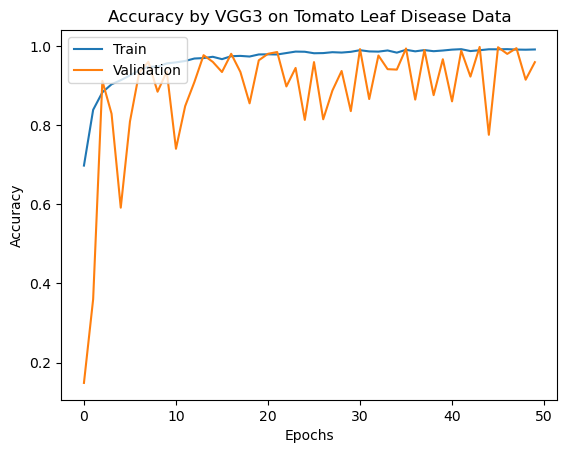

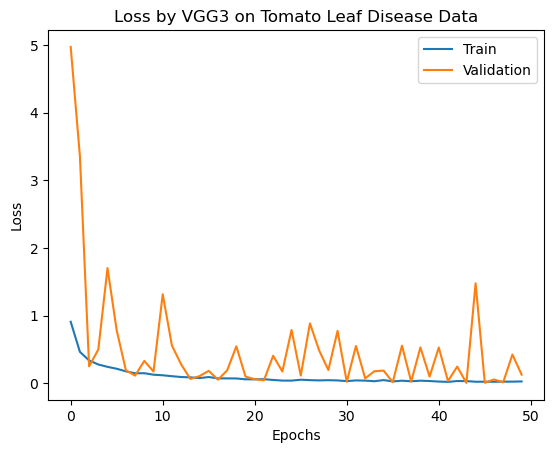

In [19]:
myplot(hist_train)

In [54]:
def myplot2(hist):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train')
    plt.plot(hist.history['val_accuracy'], label='Validation')
    plt.title("Model Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train')
    plt.plot(hist.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    
    plt.suptitle('Tomato Leave Disease Classification Data after adding DA+BN+D')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

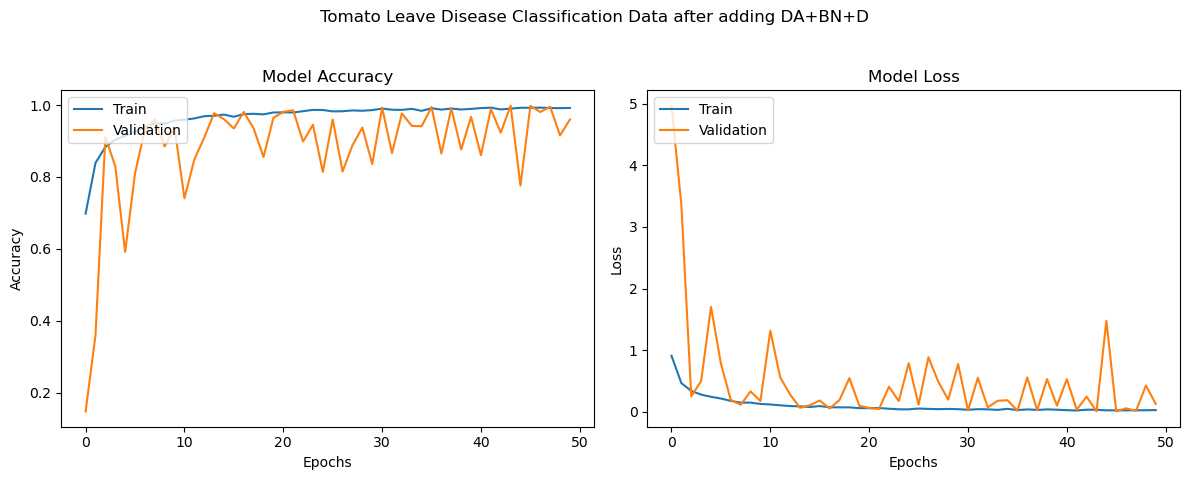

In [55]:
myplot2(hist_train)

In [20]:
simple_model.evaluate(test_generator)

3771/3771 ━━━━━━━━━━━━━━━━━━━━ 62s 16ms/step - accuracy: 0.9167 - loss: 0.3272


[0.3087461590766907, 0.9215062260627747]

<H1> Save the train model </H1>

In [21]:
simple_model.save('../UPI SUMMER COURSE/simple_model_combined.h5')

<H1> Load the existing model </H1>

In [22]:
from keras.models import load_model

In [23]:
saved_model = load_model('../UPI SUMMER COURSE/simple_model_combined.h5')

<H1> Re-evaluate the model </H1>

In [24]:
score = saved_model.evaluate(test_generator)

3771/3771 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.9161 - loss: 0.3346


<H1> Test the model from a file </H1>

In [48]:
# Print class indices
print(train_generator.class_indices)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [49]:
# leave dataset class names
def convert_index_to_label(index):
    labels = {
        0: "Bacterial spot",
        1: "Early Blight",
        2: "Late Blight",
        3: "Leaf_mold",
        4: "Septoria leaf spot",
        5: "Spider mites two-spotted spider mites",
        6: "Target spot",
        7: "Yellow leaf curl virus",
        8: "Mosaic Virus",
        9: "healthy"
    }

    return labels.get(index, "Unknown")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.6347868e-11 1.5760584e-12 1.7538570e-11 2.4807795e-08 2.1219050e-10
  3.9094783e-10 1.5188155e-11 4.2055468e-13 3.5772219e-10 1.0000000e+00]]
9
Predicted: healthy


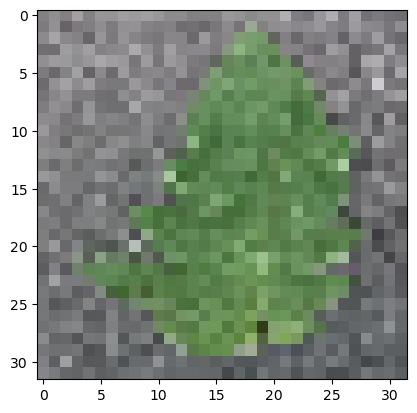

In [51]:
import keras.utils as image
import numpy as np

img = image.load_img('C:/Users/Leena Ardini/UPI SUMMER COURSE/tomato_leave_diseases_dataset/tomato/test/Tomato___healthy/image (97).jpg',target_size=(32,32))
img = np.asarray(img) / 255
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = saved_model.predict(img)
print(output)

for i, result in enumerate(output, start=1):
    label_index = np.argmax(result)
    print(label_index)
    print('Predicted: ' + str(convert_index_to_label(label_index)))